In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from pprint import pprint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['axes.labelsize'] = 20

In [2]:
file = 'https://raw.githubusercontent.com/diman25pt/Tese/main/An%C3%A1lise%20explorat%C3%A9ria%20de%20dados.csv'

In [3]:
dataset_airbnb=pd.read_csv(file)

In [4]:
# Exiba informações sobre o DataFrame
dataset_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12641 entries, 0 to 12640
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        12641 non-null  float64
 1   longitude                       12641 non-null  float64
 2   accommodates                    12641 non-null  int64  
 3   price                           12641 non-null  float64
 4   minimum_nights                  12641 non-null  int64  
 5   maximum_nights                  12641 non-null  int64  
 6   availability_30                 12641 non-null  int64  
 7   availability_365                12641 non-null  int64  
 8   number_of_reviews               12641 non-null  int64  
 9   number_of_reviews_ltm           12641 non-null  int64  
 10  number_of_reviews_l30d          12641 non-null  int64  
 11  review_scores_rating            12641 non-null  float64
 12  review_scores_location          

In [5]:
def multi_collinearity_heatmap(df, figsize=(11,9)):

    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """

    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = dataset_airbnb.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

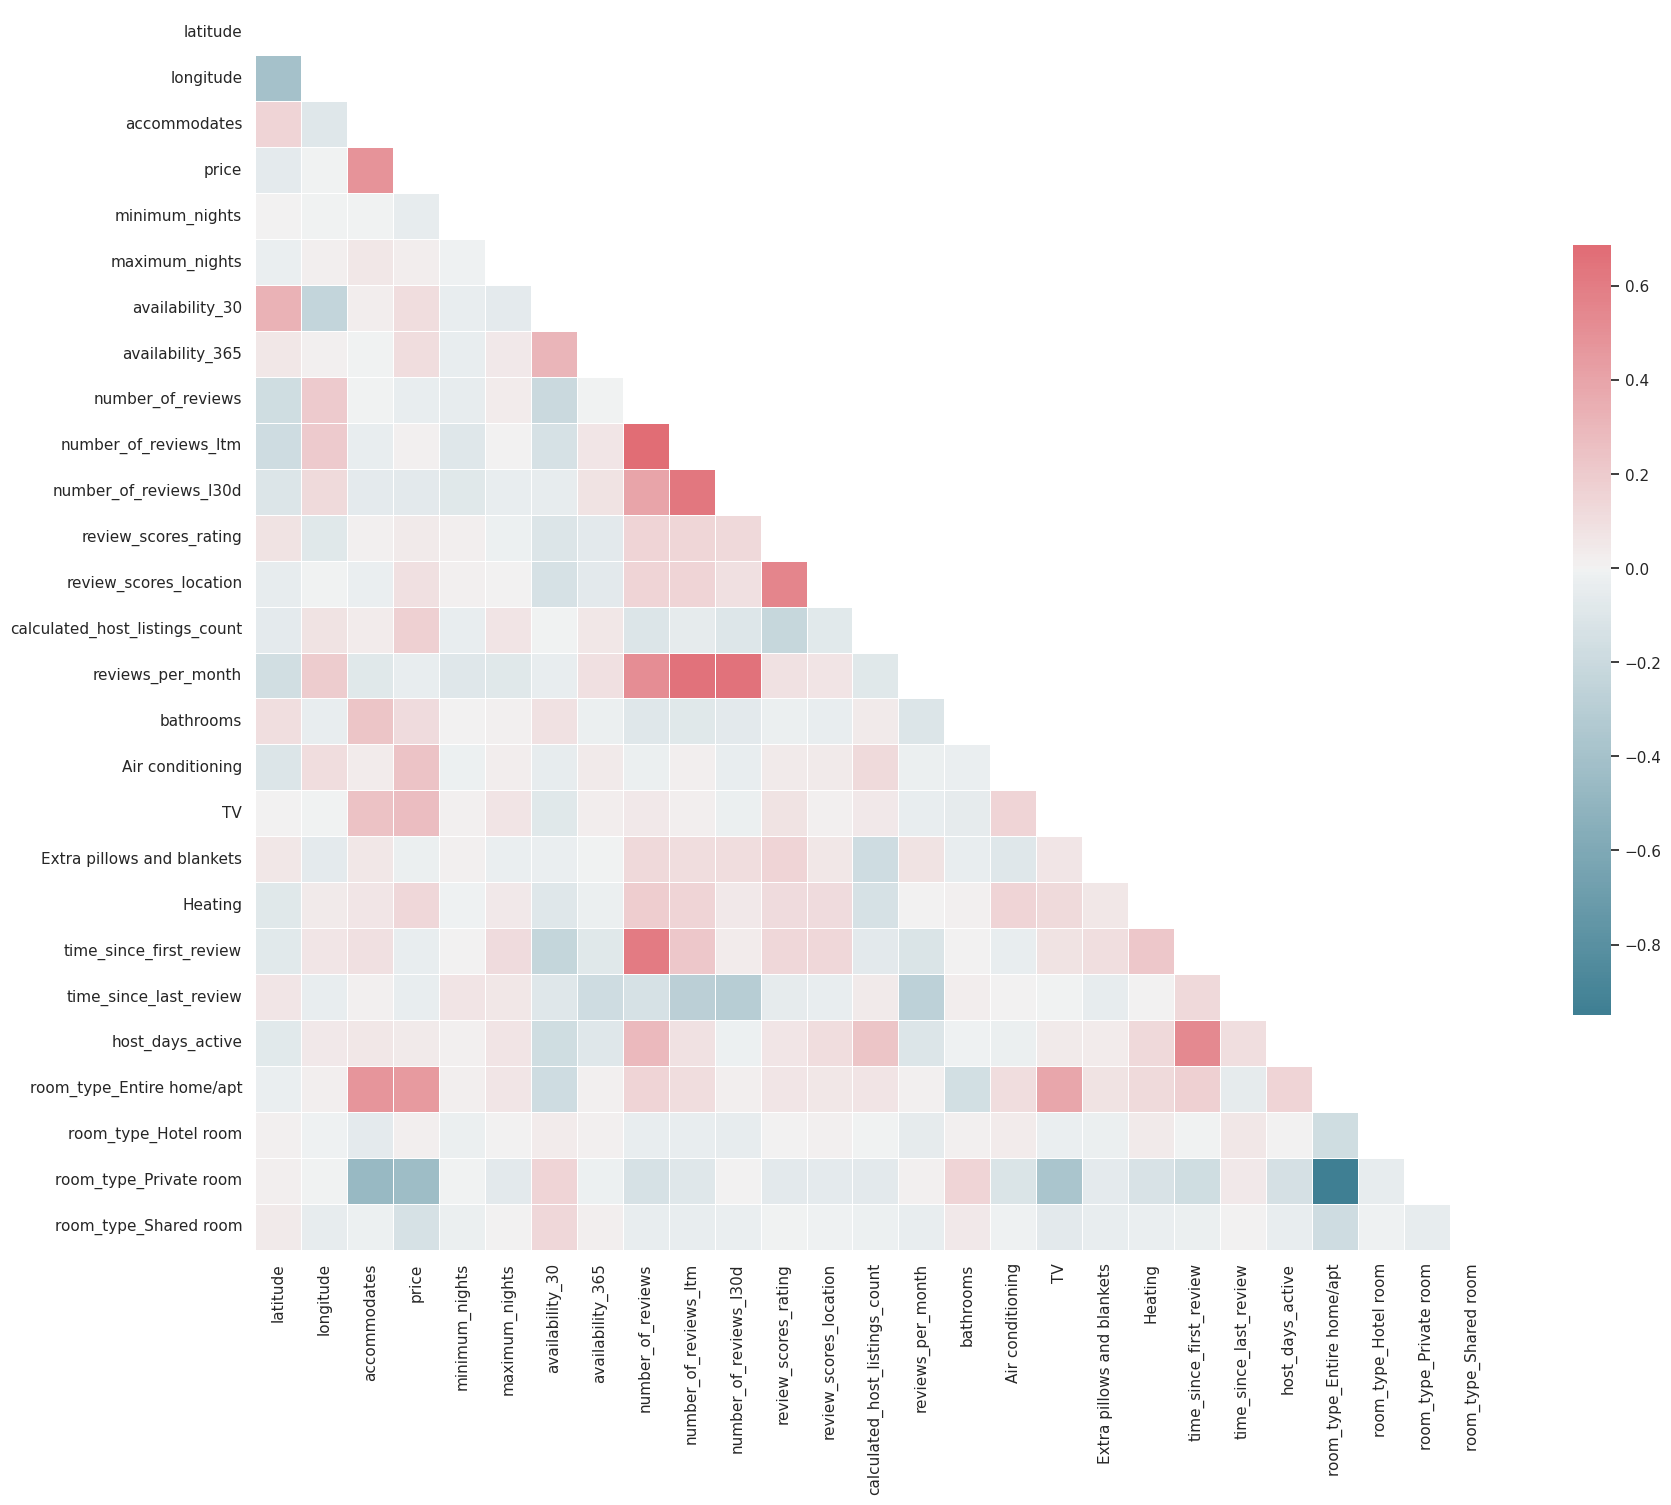

In [6]:
multi_collinearity_heatmap(dataset_airbnb, figsize=(20,20))

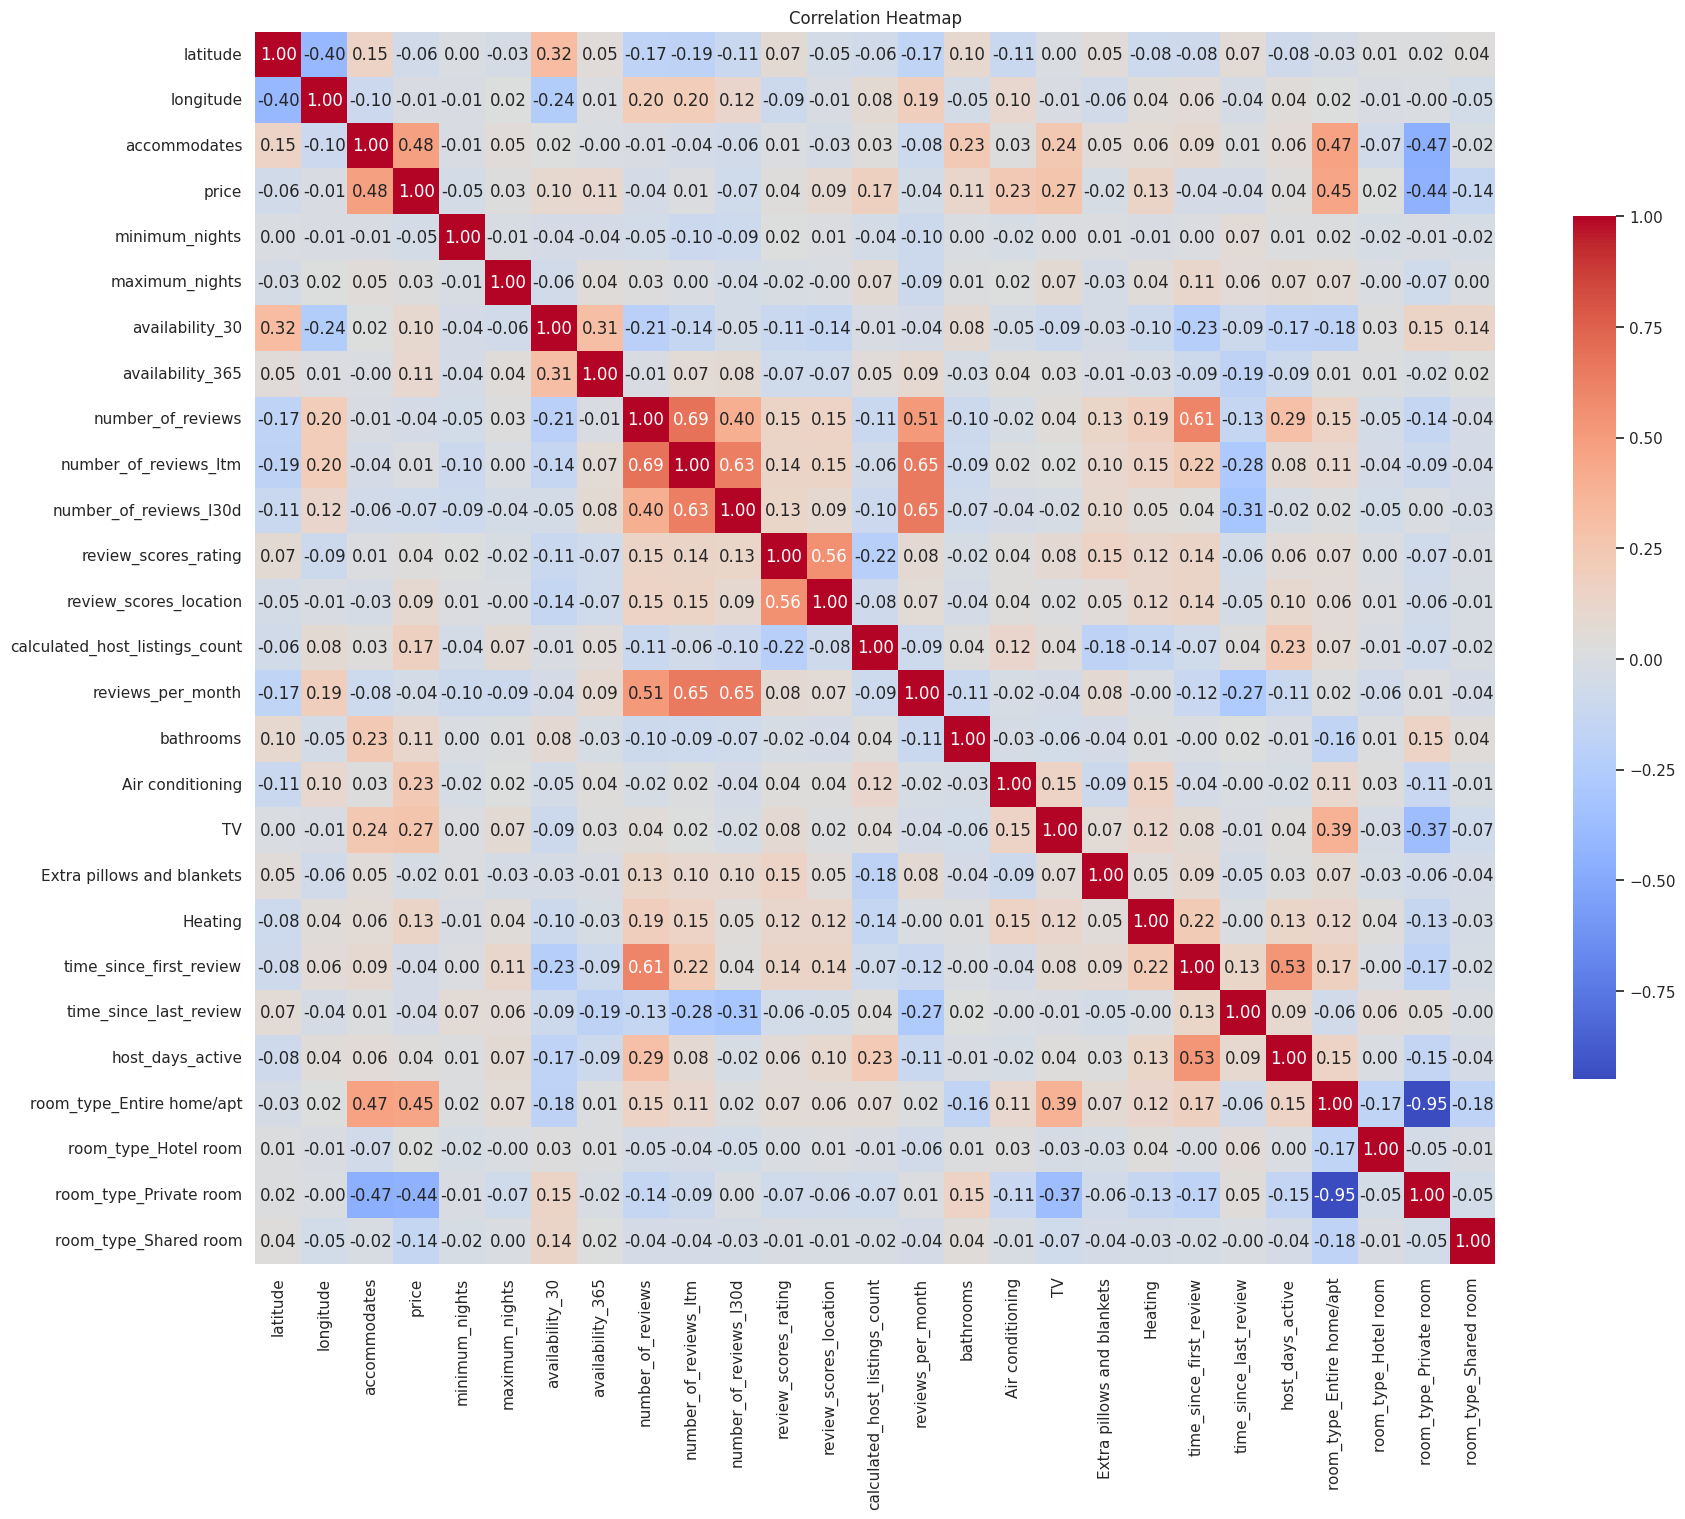

In [7]:
# Calculate the correlation matrix
correlation_matrix = dataset_airbnb.corr()

# Set the size of each cell in the heatmap
sns.set(rc={'figure.figsize':(20,16)})

# Create a heatmap with larger squares
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': 0.7})

# Set the title of the plot
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

It doesn't look like there are any significant collinear relationships with neighbourhood variables, so these will temporarily be dropped to produce a clearer heatmap for the remaining features:

# Modelação

In [8]:
!pip install statsmodels

In [9]:
import statsmodels.api as sm

y = dataset_airbnb["price"]
x = dataset_airbnb.drop("price", axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

# Adicione uma constante ao conjunto de dados
x = sm.add_constant(x)

# Ajuste o modelo OLS
model = sm.OLS(y, x).fit()

# Imprima um resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     414.6
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:05:06   Log-Likelihood:                -62785.
No. Observations:               12641   AIC:                         1.256e+05
Df Residuals:                   12615   BIC:                         1.258e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pathlib as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

def evaluate (model, ytest, prediction):
    rmse = np.sqrt (mean_squared_error (ytest, prediction))
    mae = mean_absolute_error (ytest, prediction)
    r2 = r2_score (ytest, prediction)
    return f"\n-----\nModel: {model}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2%}\n-----\n"

models = {'Linear Regression': LinearRegression(),
          'Random Forest': RandomForestRegressor (),
          'XGBRegressor': XGBRegressor (),
          'Decision Tree': DecisionTreeRegressor (),
          'Extra Trees': ExtraTreesRegressor ()
          }

xtrain, xtest, ytrain, ytest = train_test_split(x, y)

for name, model in models.items ():
    model.fit (xtrain, ytrain)
    prediction = model.predict (xtest)
    print (evaluate (name, ytest, prediction))


-----
Model: Linear Regression
RMSE: 34.98
MAE: 27.46
R2: 45.22%
-----


-----
Model: Random Forest
RMSE: 30.34
MAE: 22.85
R2: 58.79%
-----


-----
Model: XGBRegressor
RMSE: 29.46
MAE: 22.13
R2: 61.14%
-----


-----
Model: Decision Tree
RMSE: 43.30
MAE: 31.64
R2: 16.07%
-----


-----
Model: Extra Trees
RMSE: 30.13
MAE: 22.60
R2: 59.35%
-----



In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pathlib as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

def evaluate(model, ytest, prediction):
    rmse = np.sqrt(mean_squared_error(ytest, prediction))
    mse = mean_squared_error(ytest, prediction)  # Calcula o MSE
    mae = mean_absolute_error(ytest, prediction)
    r2 = r2_score(ytest, prediction)
    return f"\n-----\nModel: {model}\nRMSE: {rmse:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2%}\n-----\n"

models = {'Random Forest': RandomForestRegressor(),
          'XGBRegressor': XGBRegressor(),
          'Decision Tree': DecisionTreeRegressor(),
          'Extra Trees': ExtraTreesRegressor()
          }

xtrain, xtest, ytrain, ytest = train_test_split(x, y)

for name, model in models.items():
    model.fit(xtrain, ytrain)
    prediction = model.predict(xtest)
    print(evaluate(name, ytest, prediction))


-----
Model: Random Forest
RMSE: 29.88
MSE: 892.68
MAE: 22.52
R2: 60.35%
-----


-----
Model: XGBRegressor
RMSE: 29.50
MSE: 870.26
MAE: 22.23
R2: 61.34%
-----


-----
Model: Decision Tree
RMSE: 42.47
MSE: 1803.60
MAE: 30.55
R2: 19.88%
-----


-----
Model: Extra Trees
RMSE: 30.15
MSE: 909.14
MAE: 22.63
R2: 59.61%
-----



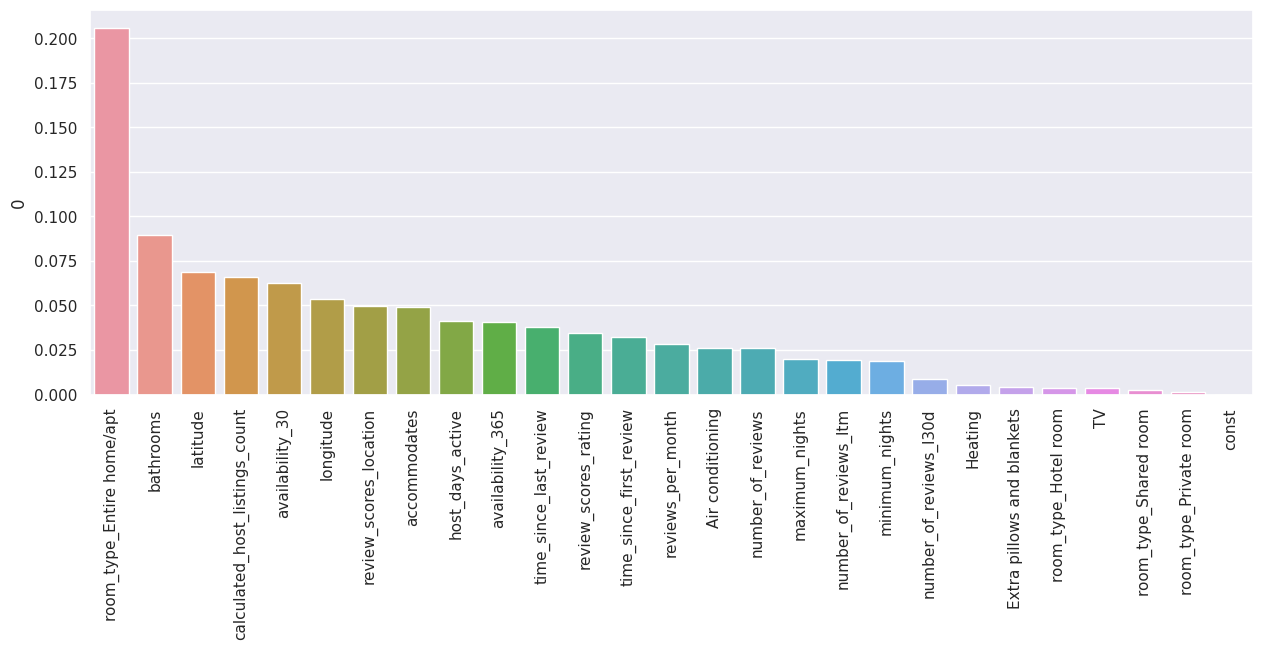

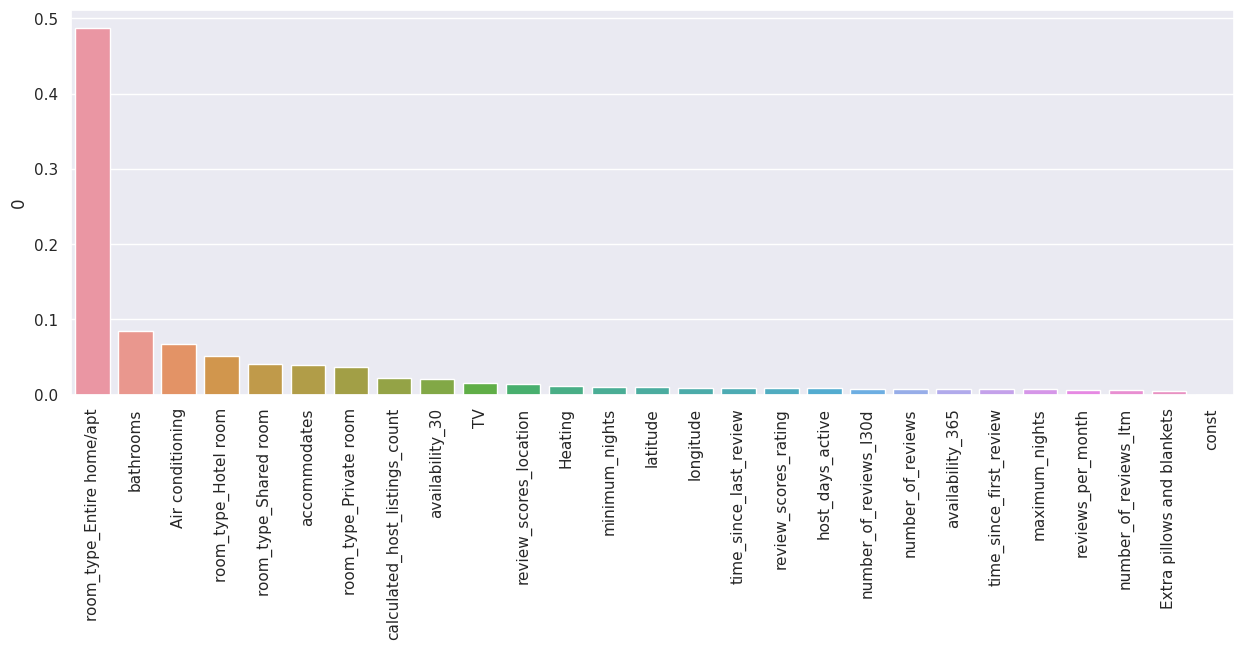

In [12]:
def important (model):
    importance = pd.DataFrame (model.feature_importances_, xtest.columns)
    importance = importance.sort_values (by = 0, ascending = False)
    plt.figure (figsize = (15, 5))
    ax = sns.barplot (x = importance.index, y = importance [0])
    ax.tick_params (axis = "x", rotation = 90)

important (models ["Random Forest"])
important (models ["XGBRegressor"])

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Suponha que você já tem um DataFrame chamado dataset_airbnb

y = dataset_airbnb["price"]
x = dataset_airbnb.drop("price", axis=1)

def evaluate(model, xtrain, ytrain, xtest, ytest):
    model.fit(xtrain, ytrain)
    train_prediction = model.predict(xtrain)
    test_prediction = model.predict(xtest)

    train_rmse = np.sqrt(mean_squared_error(ytrain, train_prediction))
    train_mse = mean_squared_error(ytrain, train_prediction)
    train_mae = mean_absolute_error(ytrain, train_prediction)
    train_r2 = r2_score(ytrain, train_prediction)

    test_rmse = np.sqrt(mean_squared_error(ytest, test_prediction))
    test_mse = mean_squared_error(ytest, test_prediction)
    test_mae = mean_absolute_error(ytest, test_prediction)
    test_r2 = r2_score(ytest, test_prediction)

    results = {
        'Model': [str(model)],
        'Train R2': [train_r2],
        'Test R2': [test_r2]
    }

    return pd.DataFrame(results)

models = {'Random Forest': RandomForestRegressor(),
          'XGBRegressor': XGBRegressor(),
          'Decision Tree': DecisionTreeRegressor(),
          'Extra Trees': ExtraTreesRegressor()
          }

xtrain, xtest, ytrain, ytest = train_test_split(x, y)

results_df = pd.DataFrame()

for name, model in models.items():
    model_results = evaluate(model, xtrain, ytrain, xtest, ytest)
    results_df = pd.concat([results_df, model_results])

print(results_df)

                                               Model  Train R2   Test R2
0                            RandomForestRegressor()  0.943150  0.591297
0  XGBRegressor(base_score=None, booster=None, ca...  0.904322  0.613769
0                            DecisionTreeRegressor()  1.000000  0.153130
0                              ExtraTreesRegressor()  1.000000  0.593411
